In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utils import plot_mean_std_shaded, plot_mean_std_cap
import scienceplots
plt.style.use(['science','no-latex'])

In [9]:
# read csv
mode = 'ED_merged'
data = np.genfromtxt(f'./results/{mode}.csv', delimiter=',', skip_header=0, skip_footer=0)

In [10]:
data[:, 0]

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  2.,  2.,  2.,  2.,  2.,  2.,
        2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,
        2.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,
        3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  4.,  4.,  4.,  4.,  4.,
        4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,
        4.,  4.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,
        5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  6.,  6.,  6.,  6.,
        6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,
        6.,  6.,  6.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,
        7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  8.,  8.,  8.,
        8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,
        8.,  8.,  8.,  8.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,
        9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,  9., 10

In [11]:
data.shape

(200, 42)

In [12]:
z = np.mean(data[:][:, 2::2], axis=-1)
z_error = np.std(data[:][:, 2::2], axis=-1)
# z_error = np.sqrt(np.sum(data[:][:, 3::2]**2, axis=-1) / len(data[:][:, 3::2]))
n = data[:][:, 0]
latent = data[:][:, 1]

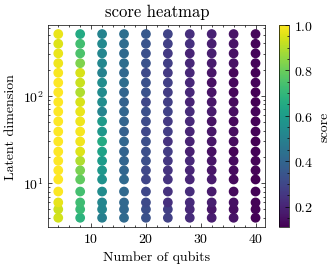

In [13]:
# heatmap
fig, ax = plt.subplots()
c = ax.scatter(4*n, latent, c=z, cmap='viridis')
ax.set_xlabel('Number of qubits')
ax.set_ylabel('Latent dimension')
ax.set_yscale('log')
fig.colorbar(c, ax=ax, label='score')
plt.title('score heatmap')
plt.show()

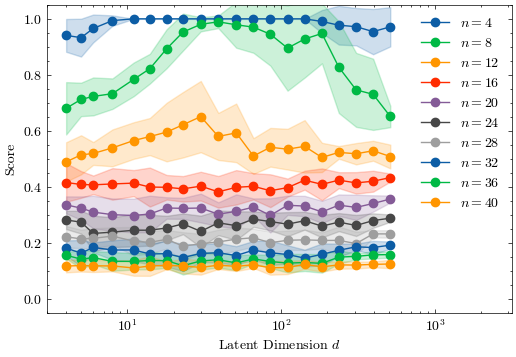

In [14]:
plt.figure(figsize=(6, 4))
for ind, i in enumerate(np.unique(n).astype(int)):
    plot_mean_std_shaded(latent[n == i], z[n == i], z_error[n == i], color=f'C{ind}', label=f'$n = {4 * i}$', marker='o')
    # plot_mean_std_cap(latent[n == i], z[n == i], z_error[n == i], color=f'C{ind}', label=f'$n = {4 * i}$')
    
plt.xlabel('Latent Dimension $d$')
plt.ylabel('Score')
plt.ylim(-0.05, 1.05)
plt.xlim(3, 10**3.5)
plt.xscale('log')
# plt.yscale('log')
plt.legend()
plt.savefig(f'./{mode}_score_latent.pdf')
plt.show()

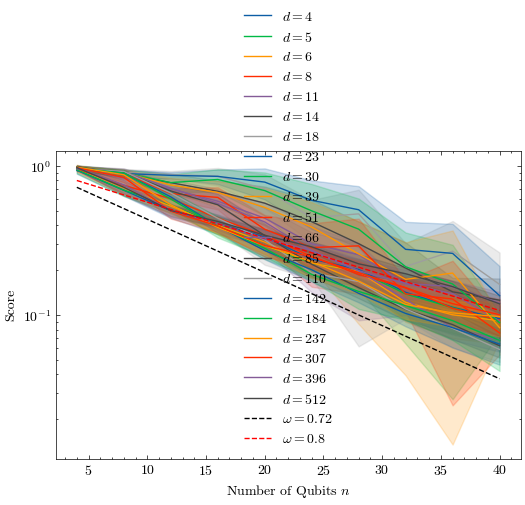

In [8]:
plt.figure(figsize=(6, 4))
for ind, i in enumerate(np.unique(latent).astype(int)):
    if True:
        plot_mean_std_shaded(4 * n[latent == i], z[latent == i], z_error[latent == i], color=f'C{ind}', label=f'$d = {i}$')
    
# plt.plot([4, 40], [15/16, (15/16)**10], 'k--')
plt.plot([4, 40], [0.72, (0.72)**10], 'k--', label=r'$\omega=0.72$')
plt.plot([4, 40], [0.8, (0.8)**10], 'r--', label=r'$\omega=0.8$')
# plt.plot([4, 40], [0.9, (0.9)**10], 'k--')
    
plt.xlabel(r'Number of Qubits $n$')
plt.ylabel('Score')
plt.yscale('log')
plt.legend()
plt.savefig(f'./{mode}_score_n.pdf')
plt.show()

In [44]:
np.exp(np.log(0.6)/20)

0.9747821379701602